Состояние системы на 10-й итерации
[0.1399917938 0.3637223804 0.181731542  0.3145542838]
Аналитическое решение
[0.1363636364 0.3636363636 0.1818181818 0.3181818182]


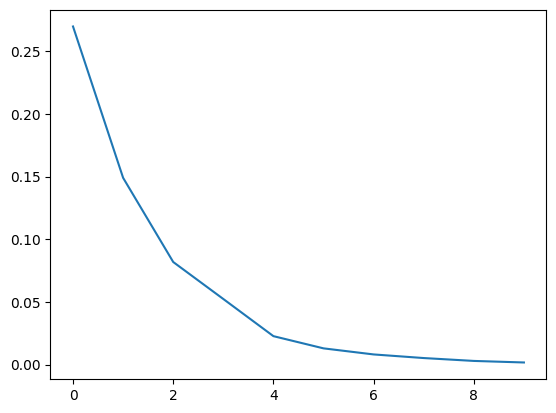

In [27]:
import numpy as np
from matplotlib.pyplot import plot

SIZE = 4
ITERS = 10
%precision 10

def generate_prob_seq(size):
    values = [np.random.randint(1, 100) for _ in range(size)]
    values = [v / sum(values) for v in values]
    return values


def get_initial_state():
    return generate_prob_seq(SIZE)


def get_transition_matrix():
    return [generate_prob_seq(SIZE) for _ in range(SIZE)]


def get_result(P):
    p = np.zeros(SIZE)
    p[-1] = 1
    p = p.T

    P = P.T
    P = P - np.identity(SIZE)
    P[-1] = np.ones(SIZE)

    return np.linalg.solve(P, p)


def transition(P, p0, n=1):
    p = p0
    for _ in range(n):
        p = p @ P
    return p


def round_seq(p, e):
    return [round(v, e) for v in p]


def main():

    p = np.array([0.9, 0, 0, .1])
    P = np.array(
        [[0.6, 0.4, 0, 0], [0, 0.5, 0.5, 0], [0.3, 0, 0, 0.7], [0, 0.4, 0, 0.6]]
    )
    solution = get_result(P)  # аналитическое решение

    stds = []
    for i in range(ITERS):
        pn = p @ P
        std = np.std(pn - p)
        stds.append(std)
        p = pn

    print(f"Состояние системы на {ITERS}-й итерации")
    print(p)
    print("Аналитическое решение")
    print(solution)
    plot(stds)


if __name__ == "__main__":
    main()
